In [26]:

import tensorflow as tf
from src.dataset import extract_image_features, build_sequence_dataset
from src.text_processing import preprocess_captions, tokenize, vocabulary, padded_seq
from src.models import build_caption_model


CAPTIONS_PATH = "../data/captions/captions.txt"
IMAGE_FOLDER = "../data/images/flickr8k_images/images"

MAX_LENGTH = 22
BATCH_SIZE = 64
EPOCHS = 10

#Text processing
df = preprocess_captions(CAPTIONS_PATH)
df = tokenize(df)

sequences, word_to_idx = vocabulary(df)
padded_sequences = padded_seq(sequences, max_length=MAX_LENGTH)

In [27]:
#Precompute CNN features (2048 per image)
image_features = extract_image_features(
    IMAGE_FOLDER,
    df["image"].unique()
)

In [28]:
#Build seq2seq dataset arrays
X_img, X_in, Y_out = build_sequence_dataset(df, padded_sequences, image_features)

print("X_img:", X_img.shape)
print("X_in :", X_in.shape)
print("Y_out:", Y_out.shape)

X_img: (40455, 2048)
X_in : (40455, 21)
Y_out: (40455, 21)


In [29]:
#Tf.data pipeline
ds = tf.data.Dataset.from_tensor_slices(((X_img, X_in), Y_out))
ds = ds.shuffle(5000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [30]:


#Model
model = build_caption_model(
    vocab_size= len(word_to_idx),
    max_length= MAX_LENGTH
)
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

#Train te model
history = model.fit(ds, epochs= EPOCHS, steps_per_epoch= 1000)


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 220s 214ms/step - accuracy: 0.5154 - loss: 3.1899
Epoch 2/10


C:\Users\diogo\Desktop\Multi-Modal Classification and Analysis of Images and Text using Deep Learning\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 209s 209ms/step - accuracy: 0.5739 - loss: 2.6038
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 240s 240ms/step - accuracy: 0.6332 - loss: 1.9852
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 245s 245ms/step - accuracy: 0.6557 - loss: 1.7342
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 244s 244ms/step - accuracy: 0.6698 - loss: 1.5986
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 243s 243ms/step - accuracy: 0.6794 - loss: 1.5024
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 249s 248ms/step - accuracy: 0.6883 - loss: 1.4239
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 258s 257ms/step - accuracy: 0.6964 - loss: 1.3567
Epoch 9/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 244s 244ms/step - accuracy: 0.7037 - loss: 1.2964
Epoch 10/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 232s 232ms/step - accuracy: 0.7108 - loss: 1.2421


In [32]:

#Save model
model.save("../models/caption_model.keras")

#Save history for plots later
import json
with open("../models/history.json", "w") as f:
    json.dump(history.history, f)

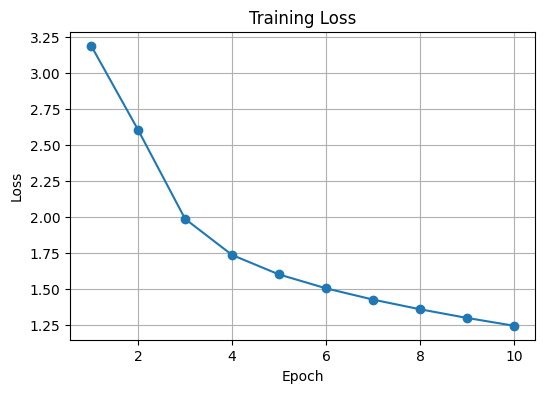

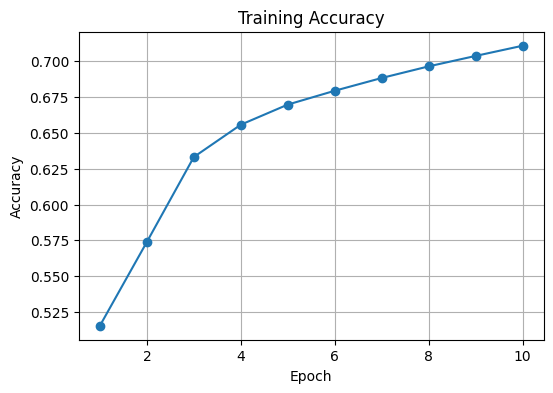

In [33]:
import json
import matplotlib.pyplot as plt

HISTORY_PATH = "../models/history.json"

# Load history
with open(HISTORY_PATH, "r") as f:
    history = json.load(f)

loss = history.get("loss", [])
acc  = history.get("accuracy", [])

epochs = range(1, len(loss) + 1)

# Plot loss
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, marker="o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(6,4))
plt.plot(epochs, acc, marker="o")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
